In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 39s 48ms/step - loss: 1.6251 - accuracy: 0.4054 - val_loss: 1.2694 - val_accuracy: 0.5463
Epoch 2/10
782/782 [==============================] - 37s 48ms/step - loss: 1.3070 - accuracy: 0.5336 - val_loss: 1.1537 - val_accuracy: 0.5974
Epoch 3/10
782/782 [==============================] - 36s 47ms/step - loss: 1.1759 - accuracy: 0.5867 - val_loss: 1.0219 - val_accuracy: 0.6415
Epoch 4/10
782/782 [==============================] - 37s 47ms/step - loss: 1.0794 - accuracy: 0.6219 - val_loss: 0.9721 - val_accuracy: 0.6659
Epoch 5/10
782/782 [==============================] - 36s 47ms/step - loss: 1.0072 - accuracy: 0.6481 - val_loss: 0.9171 - val_accuracy: 0.6792
Epoch 6/10
782/782 [==============================] - 37s 47ms/step - loss: 0.9577 - accuracy: 0.6644 - val_loss: 0.9049 - val_accuracy: 0.6856
Epoch 7/10
782/782 [==============================] - 36s 46ms/step - loss: 0.9071 - accuracy: 0.6841 - val_loss: 0.8695 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 3s 9ms/step - loss: 0.8277 - accuracy: 0.7175
Test accuracy: 0.7174999713897705


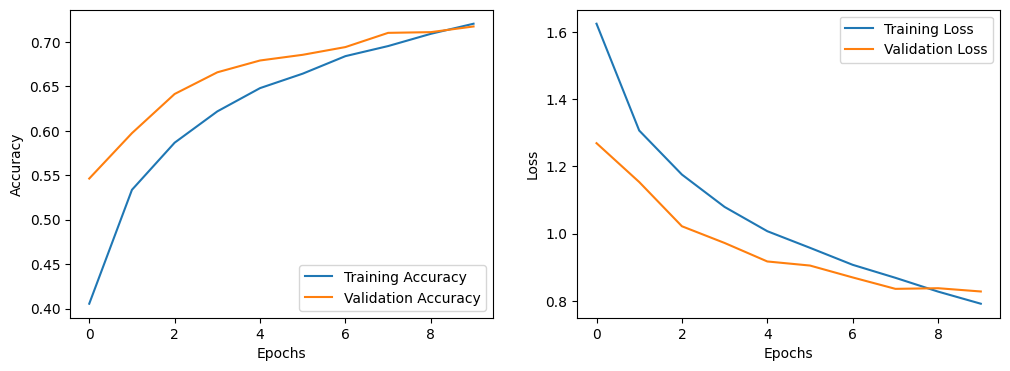

In [ ]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(X_test)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels to labels
true_labels = np.argmax(y_test, axis=1)

# Print some of the predicted and true labels
print("Predicted labels:", predicted_labels[:10])
print("True labels:", true_labels[:10])


313/313 [==============================] - 3s 10ms/step
Predicted labels: [3 8 8 0 4 6 1 6 3 1]
True labels: [3 8 8 0 6 6 1 6 3 1]


In [ ]:
# Define CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convert predictions to class names
predicted_class_names = [classes[label] for label in predicted_labels]
true_class_names = [classes[label] for label in true_labels]

# Print some of the predicted and true labels with class names
print("Predicted labels with class names:", predicted_class_names[:10])
print("True labels with class names:", true_class_names[:10])


Predicted labels with class names: ['cat', 'ship', 'ship', 'airplane', 'deer', 'frog', 'automobile', 'frog', 'cat', 'automobile']
True labels with class names: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


In [ ]:
# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate using mean squared error and R2 score
mse = mean_squared_error(true_labels, predicted_labels)
r2 = r2_score(true_labels, predicted_labels)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Test Accuracy: 71.75%
Mean Squared Error: 5.1526
R2 Score: 0.37544242424242424


predicted labels


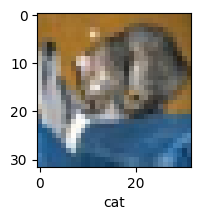

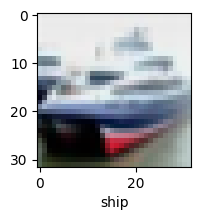

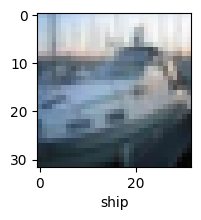

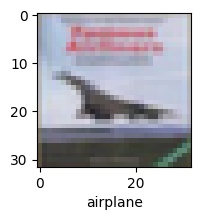

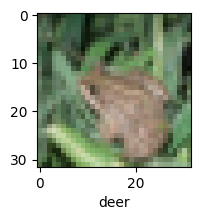

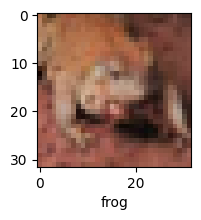

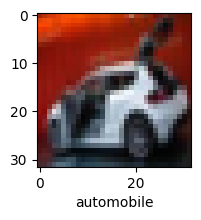

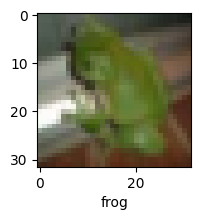

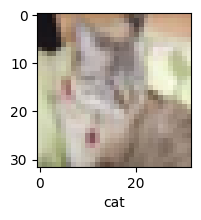

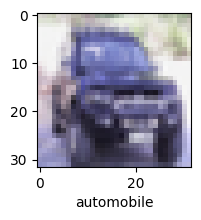

In [ ]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()
print('predicted labels')
# Plot some of the predicted labels with images
for i in range(10):  # plotting first 10 predictions
    plot_sample(X_test, predicted_labels, i)




True labels


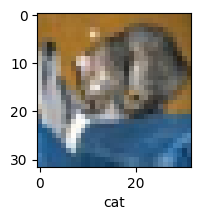

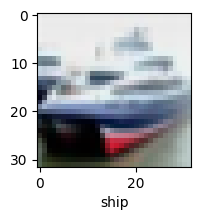

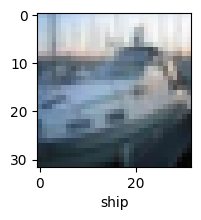

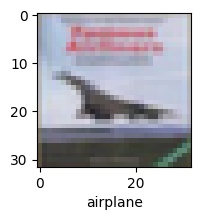

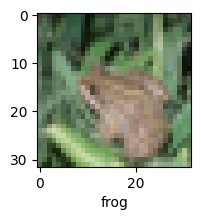

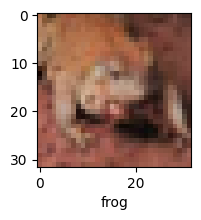

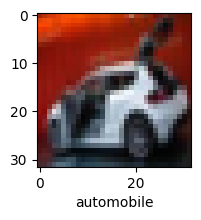

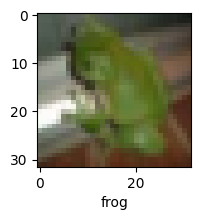

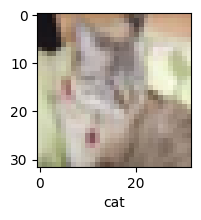

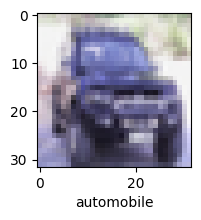

In [ ]:
print('True labels')
# Plot some of the true labels with images
for i in range(10):  # plotting first 10 true labels
    plot_sample(X_test, true_labels, i)


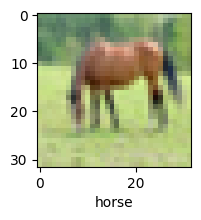

In [ ]:
plot_sample(X_test, predicted_labels, 60)

In [ ]:
predicted_class_name = predicted_class_names[60]
predicted_class_index = classes.index(predicted_class_name)
print('Predicted class name:', predicted_class_name)


Predicted class name: horse


New image prediction:

In [72]:
from tensorflow.keras.preprocessing import image

# Load a new image for prediction
new_image_path = 'pred_img.jpeg'  # Replace with your image path
new_image = image.load_img(new_image_path, target_size=(32, 32))  # Resize to 32x32
new_image = image.img_to_array(new_image)  # Convert to numpy array
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension
new_image = new_image.astype('float32') / 255.0  # Normalize

# Make prediction
new_image_prediction = model.predict(new_image)

# Convert prediction to label
new_predicted_label = np.argmax(new_image_prediction, axis=1)[0]
new_predicted_class_name = classes[new_predicted_label]

# Print prediction
print(f"Predicted class for new image: {new_predicted_class_name}")


1/1 [==============================] - 0s 17ms/step
Predicted class for new image: airplane
